In [1]:
import pandas as pd

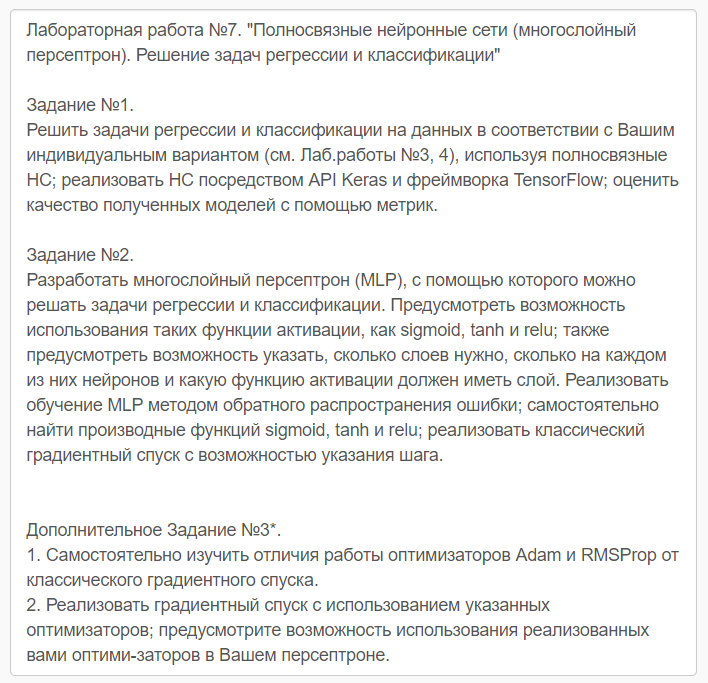

# Задание 1

## Регрессия

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df_reg = pd.read_csv(r"../data/prepared_cars.csv").drop("Unnamed: 0", axis=1)
df_reg

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,manufacturer_name_0,manufacturer_name_1,manufacturer_name_2,manufacturer_name_3,manufacturer_name_4,manufacturer_name_5,model_name_0,model_name_1,model_name_2,model_name_3,model_name_4,model_name_5,model_name_6,model_name_7,model_name_8,model_name_9,model_name_10,transmission_0,transmission_1,color_0,color_1,color_2,color_3,engine_fuel_0,engine_fuel_1,engine_fuel_2,engine_type_0,engine_type_1,body_type_0,body_type_1,body_type_2,body_type_3,state_0,state_1,drivetrain_0,drivetrain_1,location_region_0,location_region_1,location_region_2,engine_has_gas,has_warranty,is_exchangeable,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,190000,2010,2.5,10900.00,9,13,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1
1,290000,2002,3.0,5000.00,12,54,83,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1
2,402000,2001,2.5,2800.00,4,72,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1
3,10000,1999,3.0,9999.00,9,42,86,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0
4,280000,2001,2.5,2134.11,14,7,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,2750.00,5,85,301,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,1
38527,321000,2004,2.2,4800.00,4,20,317,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1
38528,777957,2000,3.5,4300.00,3,63,369,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1
38529,20000,2001,2.0,4000.00,7,156,490,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1


In [4]:
from sklearn.model_selection import train_test_split

y = df_reg["price_usd"]
x = df_reg.drop("price_usd", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [6]:
regmodel = keras.Sequential([
    keras.layers.Input([58,]),

    keras.layers.Dense(units=64, activation="relu"),

    keras.layers.Dense(units=128, activation="silu"),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(1, activation="linear")
])

regmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3776      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20417 (79.75 KB)
Trainable params: 20417 (

In [7]:
regmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.004), loss="mse")
regmodel.fit(x_train, y_train, epochs=100)

Epoch 1/100
843/843 [==============================] - 3s 2ms/step - loss: 45759528.0000
Epoch 2/100
843/843 [==============================] - 2s 2ms/step - loss: 31450504.0000
Epoch 3/100
843/843 [==============================] - 2s 2ms/step - loss: 30224406.0000
Epoch 4/100
843/843 [==============================] - 2s 2ms/step - loss: 29184206.0000
Epoch 5/100
843/843 [==============================] - 2s 2ms/step - loss: 28399836.0000
Epoch 6/100
843/843 [==============================] - 2s 2ms/step - loss: 27682632.0000
Epoch 7/100
843/843 [==============================] - 2s 3ms/step - loss: 26299428.0000
Epoch 8/100
843/843 [==============================] - 2s 2ms/step - loss: 25672886.0000
Epoch 9/100
843/843 [==============================] - 2s 2ms/step - loss: 24292998.0000
Epoch 10/100
843/843 [==============================] - 2s 2ms/step - loss: 21834996.0000
Epoch 11/100
843/843 [==============================] - 2s 3ms/step - loss: 21381832.0000
Epoch 12/100
843/84

In [8]:
print(r2_score(y_train, regmodel.predict(x_train)))

843/843 [==============================] - 2s 2ms/step
0.7114622673720568


In [9]:
print(mean_squared_error(y_test, regmodel.predict(x_test)))
print(r2_score(y_test, regmodel.predict(x_test)))

362/362 [==============================] - 1s 2ms/step
12456694.691442084
362/362 [==============================] - 1s 2ms/step
0.7082635683266314


In [10]:
# import pickle

# with open(r"./6_neural_network_regression.pickle", "wb") as f:
#     pickle.dump(regmodel, f, pickle.HIGHEST_PROTOCOL)

regmodel.save(r"../models/6_neural_network_regression.h5")

c:\Users\Halim\ML_labs_3_sem\venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Забавный факт - на тестовом наборе квадрат ошибки меньше, чем на тренировочном. Также видим, что сеть не переобучилась!

Точность чуть меньше, чем у множественной линейной регрессии.

## Классификация

In [11]:
df_class = pd.read_csv(r"../data/prepared_dfdiab.csv").drop("Unnamed: 0", axis=1)
df_class.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,Diabetes_012
0,1.0,1.0,1.0,0.188235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.75,0.133333,0.133333,0.0,0.0,0.583333,0.6,0.571429,0.0
1,0.0,0.0,1.0,0.141176,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.000000,0.066667,0.0,1.0,0.500000,0.8,1.000000,0.0
2,0.0,0.0,1.0,0.176471,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.066667,0.000000,0.0,0.0,0.250000,1.0,0.857143,0.0
3,0.0,0.0,1.0,0.152941,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.100000,0.000000,0.0,1.0,0.000000,0.8,0.714286,0.0
4,1.0,1.0,1.0,0.141176,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.50,0.000000,0.000000,0.0,0.0,0.750000,1.0,0.428571,0.0


In [12]:
y = df_class["Diabetes_012"]
x = df_class.drop("Diabetes_012", axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [13]:
classmodel = tf.keras.Sequential([
    keras.layers.Input([21, ]),

    keras.layers.Dense(32, activation="tanh"),

    keras.layers.Dense(64, activation="sigmoid"),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(64, activation="sigmoid"),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(32, activation="tanh"),

    keras.layers.Dense(3, activation="softmax")
])

In [14]:
classmodel.compile(optimizer=keras.optimizers.Adam(learning_rate=0.007), loss='sparse_categorical_crossentropy')

In [15]:
classmodel.fit(x_train, y_train, epochs=100)

Epoch 1/100
304/304 [==============================] - 2s 2ms/step - loss: 1.0235
Epoch 2/100
304/304 [==============================] - 1s 2ms/step - loss: 0.9940
Epoch 3/100
304/304 [==============================] - 1s 2ms/step - loss: 0.9893
Epoch 4/100
304/304 [==============================] - 1s 2ms/step - loss: 0.9823
Epoch 5/100
304/304 [==============================] - 1s 2ms/step - loss: 0.9799
Epoch 6/100
304/304 [==============================] - 1s 2ms/step - loss: 0.9790
Epoch 7/100
304/304 [==============================] - 1s 2ms/step - loss: 0.9761
Epoch 8/100
304/304 [==============================] - 1s 3ms/step - loss: 0.9717
Epoch 9/100
304/304 [==============================] - 1s 3ms/step - loss: 0.9705
Epoch 10/100
304/304 [==============================] - 1s 3ms/step - loss: 0.9680
Epoch 11/100
304/304 [==============================] - 1s 3ms/step - loss: 0.9681
Epoch 12/100
304/304 [==============================] - 1s 3ms/step - loss: 0.9712
Epoch 13/100


In [16]:
y_pred = classmodel.predict(x_test)

y_pred = [np.argmax(pred) for pred in y_pred]

131/131 [==============================] - 0s 2ms/step


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.63      0.60      1404
         1.0       0.40      0.34      0.37      1399
         2.0       0.47      0.49      0.48      1365

    accuracy                           0.49      4168
   macro avg       0.48      0.49      0.48      4168
weighted avg       0.48      0.49      0.48      4168



У нейронки получилось выдать точность предсказания для 1-го класса такую, какую не выдавала ни одна классификационная модель из 4-ой лабы. (самый высокий показатель f1 для 1-го класса был 0,36) однако с помощью ансамблевых моделей и решающих деревьев можно добиться точности повыше.